In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pyreadstat
import scipy
from utils import sim, standardize, jitter_binary, bin_edges_equalN, plot_binned_residuals
%load_ext autoreload
%autoreload 2

In [50]:
data_folder = 'data/arsenic/'
data_df = pd.read_csv(data_folder + 'wells.dat', sep=" ")

In [52]:
data_df['dist100'] = data_df.dist/100  # transform dist in 100 m

In [53]:
X = sm.add_constant(data_df[['dist100']])
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4
deviance: 4076.2, difference with null: 41.9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.01017
Time:                        11:37:15   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

In [55]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.scatterplot(data_df.dist100, jitter_binary(data_df.switch, jitter=0.15), ax=ax)
xlims = ax.get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
plt.plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100))

In [62]:
X = standardize(data_df[['dist100', 'arsenic']], scale_factor=1)
X['dist100:arsenic'] = X.dist100 * X.arsenic
X = sm.add_constant(X)
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.650270
         Iterations 5
deviance: 3927.6, difference with null: 190.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3016
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.04625
Time:                        12:02:51   Log-Likelihood:                -1963.8
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 4.830e-41
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3511      0.040      8.810      0.000       0.273       0.429
dist100            -0.3362      0.040     -8.337      0.000      -0.415      -0.257
arsenic             0.5199      0.047     11.159      0.000       0.429       0.611
dist100:arsenic    -0.0762      0.044     -1.748      0.080      -0.162       0.009
===================================================================================
"""

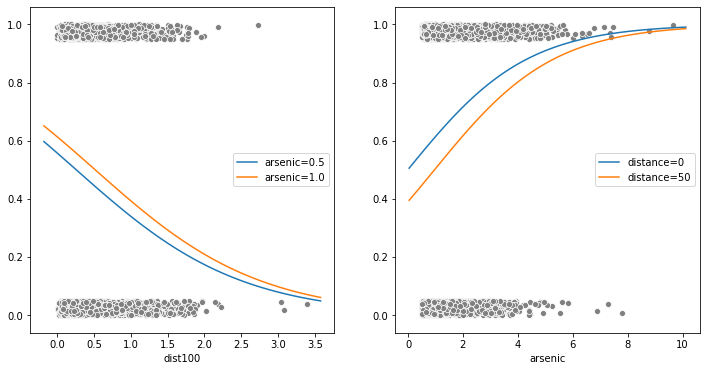

In [57]:
fig, ax = plt.subplots(figsize=[12, 6], ncols=2)
sns.scatterplot(data_df.dist100, jitter_binary(data_df.switch), color='grey', ax=ax[0])
xlims = ax[0].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100 + res.params.arsenic * 0.5), label='arsenic=0.5')
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100 + res.params.arsenic * 1.), label='arsenic=1.0')
ax[0].legend()
sns.scatterplot(data_df.arsenic, jitter_binary(data_df.switch), color='grey', ax=ax[1])
xlims = ax[1].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.arsenic + res.params.dist100 * 0), label='distance=0')
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.arsenic + res.params.dist100 * 0.5), label='distance=50')
ax[1].legend()

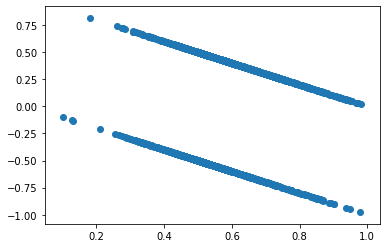

In [63]:
residDF = pd.DataFrame()
residDF['pred'] = res.predict(X)
residDF['resid'] = data_df.switch - residDF.pred
plt.scatter(residDF.pred, residDF.resid)

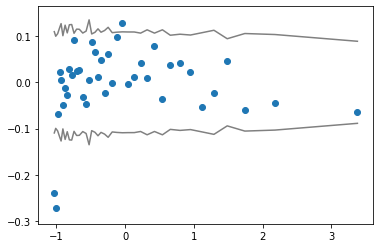

In [66]:
_ = plot_binned_residuals(X, data_df.switch, res, x_variable=X.arsenic, bins=40)

## Model arsenic on the log scale

This solves the pattern shown by residuals.

In [67]:
X = sm.add_constant(data_df[['dist100', 'educ']])
X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.639587
         Iterations 5
deviance: 3863.1, difference with null: 255.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3013
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.06192
Time:                        12:34:23   Log-Likelihood:                -1931.6
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 3.517e-52
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5160      0.104      4.968      0.000       0.312       0.720
dist100                -1.3389      0.199     -6.718      0.000      -1.730      -0.948
educ                   -0.0010      0.015     -0.064      0.949      -0.031       0.029
log_arsenic             0.9067      0.139      6.513      0.000       0.634       1.180
dist100:educ            0.0846      0.027      3.141      0.002       0.032       0.137
dist100:log_arsenic    -0.1567      0.185     -0.846      0.397      -0.520       0.206
log_arsenic:educ        0.0150      0.018      0.855      0.393      -0.019       0.049
=======================================================================================
"""

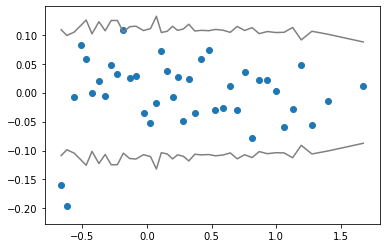

In [68]:
_ = plot_binned_residuals(X, data_df.switch, res, x_variable=X.log_arsenic, bins=40)

# Error rate

In [70]:
y = data_df.switch
error_rate = np.mean(((res.predict(X) >= 0.5) & (y==0)) | ((res.predict(X) < 0.5) & (y==1)))
pred_accuracy_null = np.sum(y==1) / len(y)
print("Error rate is: {:.2f}, error rate of null model is: {:.2f}".format(error_rate, 1 - pred_accuracy_null))

Error rate is: 0.36, error rate of null model is: 0.42


# Deviance

In [75]:
-2*res.llnull

4118.099217425315

In [80]:
X = sm.add_constant(data_df[['dist100', 'educ']])
X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
#X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))

Optimization terminated successfully.
         Current function value: 0.639709
         Iterations 5
deviance: 3863.8, difference with null: 254.3


# Average predictive comparison

In [82]:
X = sm.add_constant(data_df[['dist100', 'educ', 'arsenic']])
#X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
#X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
#X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
b = res.params
hi = 1
low = 0
deltas = (scipy.special.expit(b.const + hi * b.dist100 + b.arsenic * X.arsenic + b.educ * X.educ + b['dist100:educ'] * X.educ * hi)
 - scipy.special.expit(b.const + low * b.dist100 + b.arsenic * X.arsenic + b.educ * X.educ + b['dist100:educ'] * X.educ * low))
print('avg pred difference in prob.: {:.2f}'.format(np.mean(deltas)))

Optimization terminated successfully.
         Current function value: 0.645058
         Iterations 5
avg pred difference in prob.: -0.21


# Exercises

## Ex 8

In [17]:
data_folder = 'data/rodents/'
data_df = pd.read_csv(data_folder + 'rodents.dat', sep=" ")

In [26]:
data_df.rodent2.unique()

array([ 1.,  0., nan])

## Ex 1

In [2]:
import pyreadstat
data_iq, meta = pyreadstat.read_dta('data/nes/nes5200_processed_voters_realideo.dta')

In [10]:
data_iq.keys()

Index(['year', 'resid', 'weight1', 'weight2', 'weight3', 'age', 'gender',
       'race', 'educ1', 'urban', 'region', 'income', 'occup1', 'union',
       'religion', 'educ2', 'educ3', 'martial_status', 'occup2', 'icpsr_cty',
       'fips_cty', 'partyid7', 'partyid3', 'partyid3_b', 'str_partyid',
       'father_party', 'mother_party', 'dlikes', 'rlikes', 'dem_therm',
       'rep_therm', 'regis', 'vote', 'regisvote', 'presvote',
       'presvote_2party', 'presvote_intent', 'ideo_feel', 'ideo7', 'ideo',
       'cd', 'state', 'inter_pre', 'inter_post', 'black', 'female', 'age_sq',
       'rep_presvote', 'rep_pres_intent', 'south', 'real_ideo', 'presapprov',
       'perfin1', 'perfin2', 'perfin', 'presadm', 'age_10', 'age_sq_10',
       'newfathe', 'newmoth', 'parent_party', 'white'],
      dtype='object')

In [16]:
meta.variable_value_labels

{'age': {0: '00. na/ dk/ rf/ inap, no pre iw (1952)/',
  97: '97. 97 years old (1952, 1974, 1996 and l',
  98: '98. 98 years old (1958-1962, 1966, 1968:',
  99: '99. 99 years old (1976-1990, 1994: or ol'},
 'gender': {0: '0. na/ no pre iw (1948, 1952)', 1: '1. male', 2: '2. female'},
 'race': {1: '1. white',
  2: '2. black',
  3: '3. asian',
  4: '4. native american',
  5: '5. hispanic',
  7: '7. other',
  9: '9. dk/na/no pre iw(1948,52)/sht-form new'},
 'educ1': {0: '0. dk/ na/ no pre iw (1952)/ short-form',
  1: '1. grade school of less (0-8 grades)',
  2: '2. high school (12 grades or fewer, incl',
  3: '3. some college(13 grades or more,but no',
  4: '4. college or advanced degree (no cases'},
 'urban': {0: '0. na (1948)/ telephone (rdd) sample (20',
  1: '1. central cities',
  2: '2. suburban areas',
  3: '3. rural, small towns, outlying and adja'},
 'region': {0: '0. na(1948)',
  1: '1. northeast (ct,me,ma,nh,nj,ny,pa,ri,vt',
  2: '2. north central(il,in,ia,ks,mi,mn,mo,ne',
  3: 